### Moving Average Convergance Divergence 

Directions
MACD Calculation: 12 period EMA(exponential moving average) - 26 period EMA
Signal Calculation: 9 period EMA of the MACD
Strategy: Buy when MACD is above signal line, sell when MACD is below signal line

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df = yf.download('TSLA', start='2020-11-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100
2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500
2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000
...,...,...,...,...,...,...
2022-02-18,886.000000,886.869995,837.609985,856.979980,856.979980,22710500
2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700
2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300


In [6]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12,adjust=False).mean()
    df['EMA26'] = df.Close.ewm(span=26,adjust=False).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('Success')

In [7]:
MACD(df)

Success


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100,400.510010,400.510010,0.000000,0.000000
2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700,404.108469,402.242601,1.865868,1.036593
2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100,406.704091,403.630557,3.073533,1.871405
2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500,411.532692,406.183108,5.349583,3.049649
2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000,414.366126,407.943620,6.422506,4.052998
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,886.000000,886.869995,837.609985,856.979980,856.979980,22710500,898.689584,928.421915,-29.732331,-30.786512
2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700,886.818883,920.503998,-33.685114,-31.366232
2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300,867.929821,908.914070,-40.984249,-33.289835


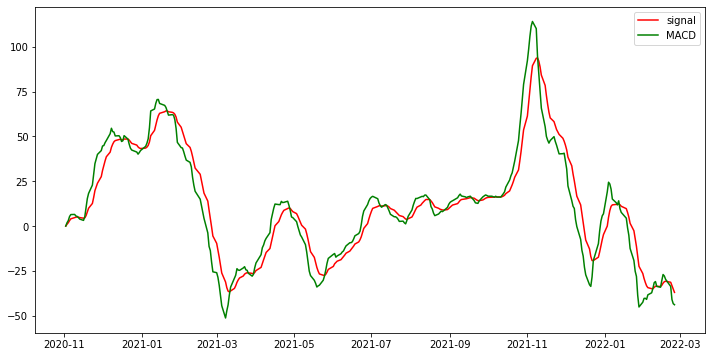

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(df.signal, label='signal',color='red')
plt.plot(df.MACD, label='MACD', color='green')
plt.legend()
plt.show()

In [11]:
Buy, Sell = [],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [12]:
Buy

[11, 33, 42, 89, 102, 141, 172, 186, 207, 226, 234, 237, 289, 301, 319, 324]

In [13]:
Sell

[8, 31, 34, 54, 99, 121, 171, 174, 197, 221, 233, 235, 258, 300, 302, 322, 328]

In [14]:
df.iloc[Buy].index

DatetimeIndex(['2020-11-17', '2020-12-18', '2021-01-04', '2021-03-12',
               '2021-03-31', '2021-05-26', '2021-07-12', '2021-07-30',
               '2021-08-30', '2021-09-27', '2021-10-07', '2021-10-12',
               '2021-12-27', '2022-01-12', '2022-02-08', '2022-02-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

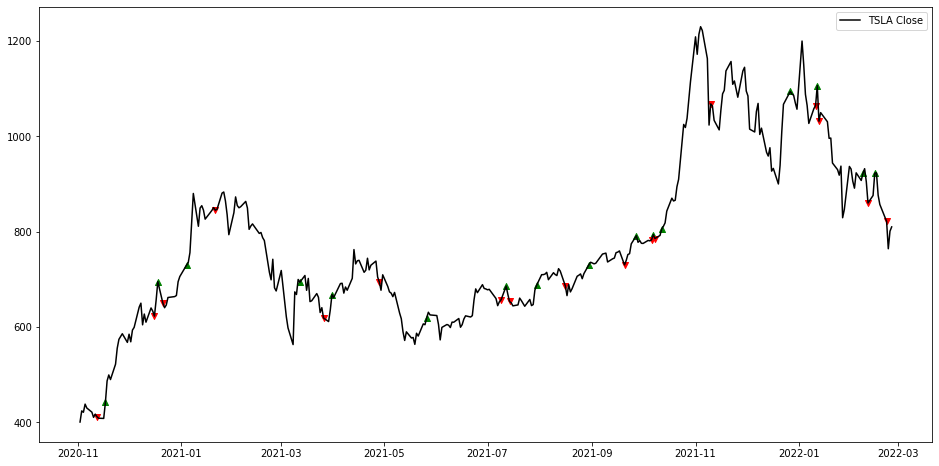

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color="red")
plt.plot(df.Close, label='TSLA Close', color="k")
plt.legend()
plt.show()

In [18]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [19]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [20]:
Buyprices

Date
2020-11-18     448.350006
2020-12-21     666.239990
2021-01-05     723.659973
2021-03-15     694.090027
2021-04-01     688.369995
2021-05-27     620.239990
2021-07-13     686.320007
2021-08-02     700.000000
2021-08-31     733.000000
2021-09-28     787.200012
2021-10-08     796.210022
2021-10-13     810.469971
2021-12-28    1109.489990
2022-01-13    1109.069946
2022-02-09     935.000000
2022-02-16     914.049988
Name: Open, dtype: float64

In [21]:
#Account for instance in which there is a sell before a purchase and hence profitability can't be calculated
#Aply principle for pruchase without subsequent sale 

if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[0])

In [26]:
profitsrel = []

for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i] - Buyprices[i]) / Buyprices[i])

In [27]:
profitsrel

[0.40111518654996725,
 -0.027377507357308883,
 0.15290333653974694,
 -0.1130257015252677,
 0.01618317870833553,
 0.06765126827246415,
 -0.04069529137679222,
 -0.03905718122209821,
 0.0024419891232520465,
 -0.0022103534138632453,
 -0.010750929179949107,
 0.36065500190530125,
 -0.027616305616209234,
 -0.08041868026870505,
 -0.07853475152489973,
 -0.09148295633053204]

In [28]:
sum(profitsrel)/len(profitsrel)

0.030611268955215112